<a href="https://colab.research.google.com/github/SiddhuNITPY/Class-Imbalance/blob/main/MNIST_Hecht.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

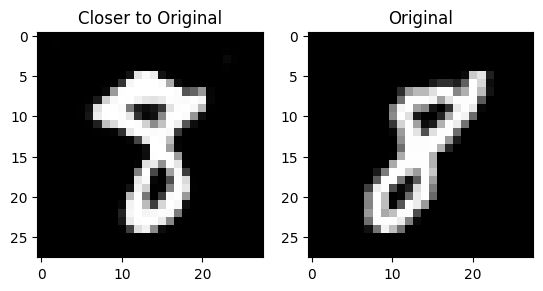

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

(x_train,y_train), (_, _) = mnist.load_data()
x_train = x_train[y_train == 8]

hq = np.load('x_test.npy')
lq = np.load('x_test_lq.npy')
hqt = np.load('y_test.npy')
lqt = np.load('y_test_lq.npy')

hq1 = hq[3]
#lq1 = lq[0]
lq1 = x_train[0]

# Get the first two images
image1 = hq1 
image2 = lq1

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(ncols=2)

# Plot the first image in the first subplot
ax1.imshow(image1, cmap='gray')
ax1.set_title('Closer to Original')

# Plot the second image in the second subplot
ax2.imshow(image2, cmap='gray')
ax2.set_title('Original')

# Show the plot
plt.show()

In [ ]:
print(hqt[0:20])
print(lqt[0:20])

comparison = hqt == lqt
equal_arrays = comparison.all()

print(equal_arrays)


[8. 2. 2. 8. 2. 2. 8. 2. 2. 2. 2. 8. 2. 2. 8. 8. 8. 2. 2. 2.]
[8. 2. 2. 8. 2. 2. 8. 2. 2. 2. 2. 8. 2. 2. 8. 8. 8. 2. 2. 2.]
True


In [ ]:
weights_ih = np.load('weights_ih.npy')
biases_ih = np.load('biases_ih.npy')
weights_ho = np.load('weights_ho.npy')
biases_ho = np.load('biases_ho.npy')

print (weights_ih.shape)
print (biases_ih.shape)
print (weights_ho.shape)
print (biases_ho.shape)

(784, 128)
(1, 128)
(128, 1)
(1, 1)


In [ ]:
# Define the sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

hidden_inputs = np.dot(hq1.flatten(), weights_ih) + biases_ih
hidden_outputs = sigmoid(hidden_inputs)
output_inputs = np.dot(hidden_outputs, weights_ho) + biases_ho
output_outputs = sigmoid(output_inputs)
prediction = np.round(output_outputs)

print(output_outputs)

[[0.00930982]]


In [ ]:
# Define the sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(x))

weights_ih = weights_ih * -1
biases_ih = biases_ih * -1
weights_ho = weights_ho * -1
biases_ho = biases_ho * -1

hidden_inputs = np.dot(hq1.flatten(), weights_ih) + biases_ih
hidden_outputs = sigmoid(hidden_inputs)
output_inputs = np.dot(hidden_outputs, weights_ho) + biases_ho
output_outputs = sigmoid(output_inputs)
prediction = np.round(output_outputs)

print(output_outputs)

[[0.98501124]]


In [ ]:
correct = 0
accuracy = 0
# Convert class labels to binary labels
hqt[hqt == 2] = 0
hqt[hqt == 8] = 1
lqt[lqt == 2] = 0
lqt[lqt == 8] = 1

for i in range(len(hq)):
        hidden_inputs = np.dot(hq[i].flatten(), weights_ih) + biases_ih
        hidden_outputs = sigmoid(hidden_inputs)
        output_inputs = np.dot(hidden_outputs, weights_ho) + biases_ho
        output_outputs = sigmoid(output_inputs)
        prediction = np.round(output_outputs)
        if prediction == hqt[i]:
          correct += 1

accuracy = correct / len(hq)
print(accuracy)
print(correct)

0.9651046859421735
1936


In [ ]:
correct = 0
accuracy = 0
for i in range(len(lq)):
        hidden_inputs = np.dot(lq[i].flatten(), weights_ih) + biases_ih
        hidden_outputs = sigmoid(hidden_inputs)
        output_inputs = np.dot(hidden_outputs, weights_ho) + biases_ho
        output_outputs = sigmoid(output_inputs)
        prediction = np.round(output_outputs)
        if prediction == lqt[i]:
          correct += 1

accuracy = correct / len(lq)
print(accuracy)
print(correct)

0.7223330009970089
1449
